In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

# Data Files

In [2]:
C_Sky = xr.open_dataset('/Users/marki/Downloads/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_allsky_clearsky.nc')
Ocean_ = xr.open_dataset('/Users/marki/Downloads/CERES_SSF1deg-Month_Aqua-MODIS_Ed4.1_Subset_200207-202203.nc')
Sc_=xr.open_dataset('/Users/marki/Downloads/Sc_climo_mon.nc')
Ac_=xr.open_dataset('/Users/marki/Downloads/Ac_climo_mon.nc')
As_=xr.open_dataset('/Users/marki/Downloads/As_climo_mon.nc')
Cb_=xr.open_dataset('/Users/marki/Downloads/Cb_climo_mon.nc')
Ci_=xr.open_dataset('/Users/marki/Downloads/Ci_climo_mon.nc')
Cs_=xr.open_dataset('/Users/marki/Downloads/Cs_climo_mon.nc')
Cu_=xr.open_dataset('/Users/marki/Downloads/Cu_climo_mon.nc')
Ns_=xr.open_dataset('/Users/marki/Downloads/Ns_climo_mon.nc')
St_=xr.open_dataset('/Users/marki/Downloads/St_climo_mon.nc')

#### Cloud Fraction of Clear Sky (fc)

In [3]:
cldarea_total_mon=C_Sky['cldarea_total_mon'][ : ,30:150, :]/100
c_f=np.ravel(cldarea_total_mon)

#### Albedo of Clear Sky (As)

In [4]:
toa_sw_all_mon=C_Sky['toa_sw_all_mon'][ : ,30:150, :]
#toa_sw_all_mon
sw_leave=np.ravel(toa_sw_all_mon)
#sw_leave
toa_solar_all_mon=C_Sky['toa_solar_all_mon'][ : ,30:150, :]
#toa_solar_all_mon
sw_income=np.ravel(toa_solar_all_mon)
#sw_income
Scene_albedo= sw_leave/sw_income
#Scene_albedo

###### Only non-NaN valuesare valid for both C_F and S_A 

In [5]:
valid = np.logical_and(~np.isnan(c_f),~np.isnan(Scene_albedo))

###### Valid values for C_F and S_A

In [6]:
C_F=c_f[valid]
S_A=Scene_albedo[valid]

##### Calculate values for log of Scene Albedo, Slope and Intercept of Regression Line 

In [7]:
y = np.log(S_A)
x = C_F
slope = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
intercept = y.mean()-slope*x.mean()
#print(slope)
#print(intercept)

###### Arrange Cloud Fraction Albedo, Slope, Intercept into Exponential Equation

In [8]:
x_values=np.arange(0,1,.01)
Best=np.exp(intercept+slope*x_values)

#### Plot Exponential Least fit Curve against Cloud Fraction vs. Albedo

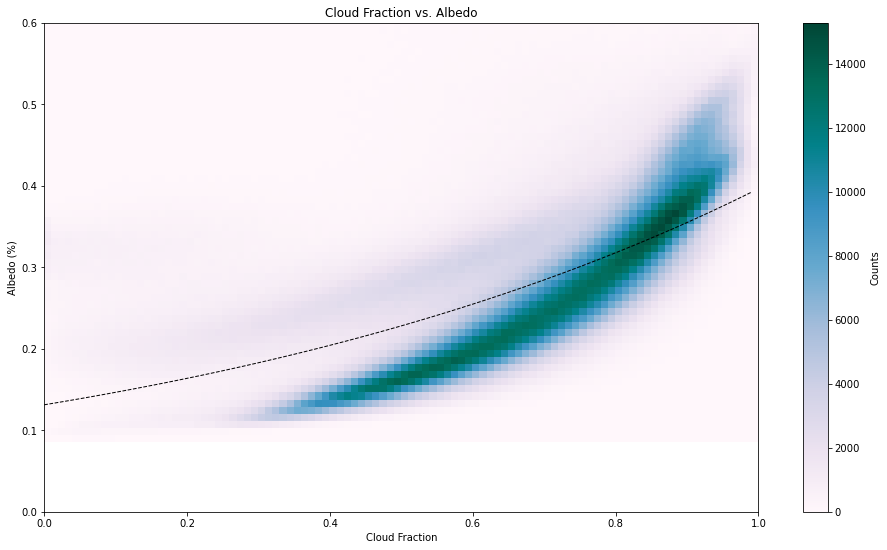

In [9]:
plt.figure(figsize=(16,9))
plt.hist2d(C_F, S_A, bins=100, cmap='PuBuGn')
plt.ylim(0,.6)
plt.plot(x_values, Best,linestyle='--', linewidth=1, color="black")
plt.title('Cloud Fraction vs. Albedo')
plt.xlabel('Cloud Fraction')
plt.ylabel('Albedo (%)')
cbar=plt.colorbar()
cbar.set_label('Counts')

# Cloud Fraction vs Albedo- All Sky Over Ocean

#### Only Display where Ocean =100%

In [10]:
Ocn_month= Ocean_['aux_ocean_mon'][0:234,30:150,:]
#Ocn_month
Oc_1d=np.ravel(Ocn_month)
#Oc_1d
full_ocean=Oc_1d==100

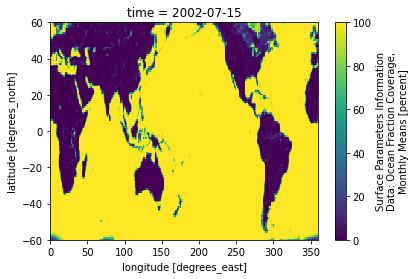

In [11]:
Ocn_month[0].plot()

#### Cloud Fraction of All Sky and Scene Albedo for All Sky

In [12]:
cldarea_total_mon=C_Sky['cldarea_total_mon'][ : ,30:150, :]/100

A_Sky_fc=np.ravel(cldarea_total_mon)


toa_sw_all_mon=C_Sky['toa_sw_all_mon'][ : ,30:150, :]
A_sw_leave=np.ravel(toa_sw_all_mon)

toa_solar_all_mon=C_Sky['toa_solar_all_mon'][ : ,30:150, :]
A_sw_income=np.ravel(toa_solar_all_mon)

A_Sky_Scene_albedo= A_sw_leave/A_sw_income

#### Use logal statements to only use not nan values and only over the ocean

In [13]:
notnan = np.logical_and(~np.isnan(A_Sky_fc),~np.isnan(A_Sky_Scene_albedo))

In [14]:
Ocean_notnan= np.logical_and(full_ocean, notnan)

In [15]:
C_F=A_Sky_fc[Ocean_notnan]
S_A=A_Sky_Scene_albedo[Ocean_notnan]

##### Calculate values for log of Scene Albedo, Slope and Intercept of Regression Line 

In [16]:
y = np.log(S_A)
x = C_F
slope = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
intercept = y.mean()-slope*x.mean()

##### Best fit line

In [17]:
x_values=np.arange(0,1,.01)
Best=np.exp(intercept+slope*x_values)

### Graph of All Sky over Ocean Only

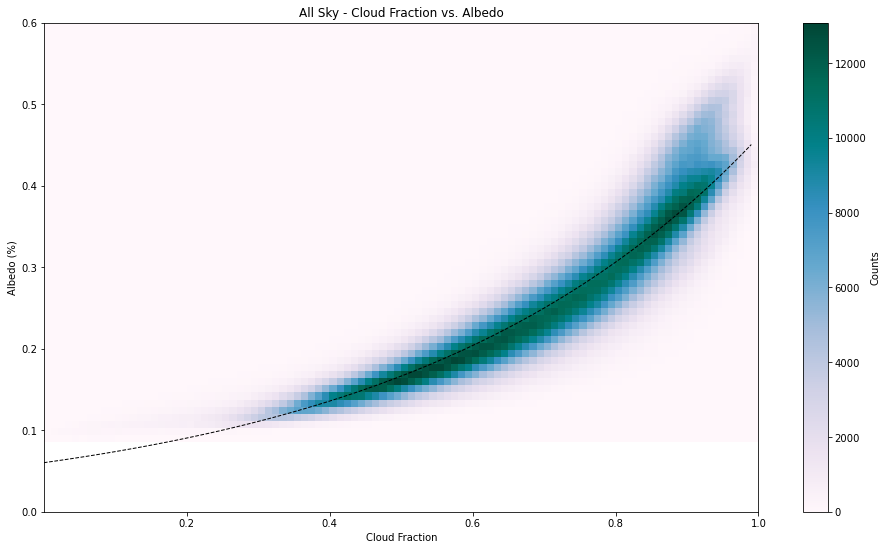

In [18]:
plt.figure(figsize=(16,9))
plt.hist2d(C_F, S_A, bins=100, cmap='PuBuGn')
plt.ylim(0,.6)
plt.plot(x_values, Best,linestyle='--', linewidth=1, color="black")
plt.title('All Sky - Cloud Fraction vs. Albedo')
plt.xlabel('Cloud Fraction')
plt.ylabel('Albedo (%)')
cbar=plt.colorbar()
cbar.set_label('Counts')

# Sc Clouds- Cloud Fraction Vs Albedo

#### Cloud Fraction For Sc Clouds (fc) and Scene Albedo for Sc (Ac)

In [19]:
#Sc Cloud Freaction (fc)
Sc_fraction= Sc_['cldarea_cldtyp_mon'][:,30:150,:]/100
#Sc_fraction
Sc_fc=np.ravel(Sc_fraction)
#Sc_fraction1d

#Sc Cloud Albedo (Ac)
Sc_Albedo= Sc_['toa_albedo_cldtyp_mon'][:,30:150,:]
#Sc_Albedo
Ac_Sc=np.ravel(Sc_Albedo)



##### Clear Sky Albedo (As)

In [20]:
#Clear Sky Albedo (As)
toa_sw_clr_mon=C_Sky['toa_sw_all_mon'][ : ,30:150, :]
C_sw_leave=np.ravel(toa_sw_all_mon)

toa_solar_all_mon=C_Sky['toa_solar_all_mon'][ : ,30:150, :]
A_sw_income=np.ravel(toa_solar_all_mon)

C_Sky_Scene_albedo= C_sw_leave/A_sw_income

In [21]:
Sc_notnan = np.logical_and(~np.isnan(Sc_fc),~np.isnan(C_Sky_Scene_albedo), ~np.isnan(Ac_Sc))

In [22]:
Sc_Oc_notnan=np.logical_and(full_ocean, Sc_notnan)

In [23]:
Sc_fc=Sc_fc[Sc_Oc_notnan]
Sc_Ac=Ac_Sc[Sc_Oc_notnan]
As=C_Sky_Scene_albedo[Sc_Oc_notnan]


In [32]:
Sc_fc[5]

0.21731998

In [33]:
Sc_Ac[5]

0.48954535

In [34]:
As[5]

0.5651853

In [24]:
Final_Sc_Albedo= Sc_fc*Sc_Ac+(1- Sc_fc)*As

In [35]:
Final_Sc_Albedo[5]

0.54874724

In [36]:
(0.2173*0.4895)+(1-0.2173)*0.5652

0.5487503899999999

In [25]:
y = np.log(Final_Sc_Albedo)
x = Sc_fc
slope = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
intercept = y.mean()-slope*x.mean()

In [26]:
x_values=np.arange(0,1,.01)
Best=np.exp(intercept+slope*x_values)

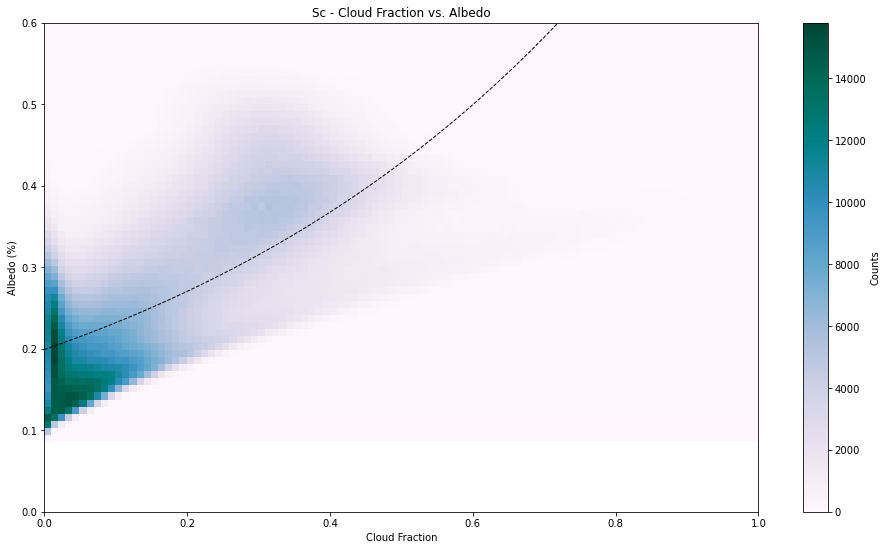

In [29]:
plt.figure(figsize=(16,9))
plt.hist2d(Sc_fc, Final_Sc_Albedo, bins=100, cmap='PuBuGn')
plt.ylim(0,.6)
plt.plot(x_values, Best,linestyle='--', linewidth=1, color="black")
plt.title('Sc - Cloud Fraction vs. Albedo')
plt.xlabel('Cloud Fraction')
plt.ylabel('Albedo (%)')
cbar=plt.colorbar()
cbar.set_label('Counts')

# Ac Clouds- Cloud Fraction Vs Albedo

#### Cloud Fraction For Ac Clouds (fc) and Scene Albedo for Ac (Ac)

In [38]:
#Ac Cloud Fraction (fc)
Ac_fraction= Ac_['cldarea_cldtyp_mon'][:,30:150,:]/100
#Ac_fraction
Ac_fc=np.ravel(Ac_fraction)
#Ac_fraction1d

#Ac Cloud Albedo (Ac)
Ac_Albedo= Ac_['toa_albedo_cldtyp_mon'][:,30:150,:]
#Ac_Albedo
Ac_Ac=np.ravel(Ac_Albedo)


##### Clear Sky Albedo (As)

#Clear Sky Albedo (As)
toa_sw_clr_mon=C_Sky['toa_sw_all_mon'][ : ,30:150, :]
C_sw_leave=np.ravel(toa_sw_all_mon)

toa_solar_all_mon=C_Sky['toa_solar_all_mon'][ : ,30:150, :]
A_sw_income=np.ravel(toa_solar_all_mon)

C_Sky_Scene_albedo= C_sw_leave/A_sw_income

In [39]:
Ac_notnan = np.logical_and(~np.isnan(Ac_fc),~np.isnan(C_Sky_Scene_albedo), ~np.isnan(Ac_Ac))

In [40]:
Ac_Oc_notnan=np.logical_and(full_ocean, Ac_notnan)

In [42]:
Ac_fc=Ac_fc[Ac_Oc_notnan]
Ac_Ac=Ac_Ac[Ac_Oc_notnan]
As=C_Sky_Scene_albedo[Ac_Oc_notnan]

In [43]:
Final_Ac_Albedo= Ac_fc*Ac_Ac+(1- Ac_fc)*As

In [44]:
y = np.log(Final_Ac_Albedo)
x = Ac_fc
slope = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
intercept = y.mean()-slope*x.mean()

In [45]:
x_values=np.arange(0,1,.01)
Best=np.exp(intercept+slope*x_values)

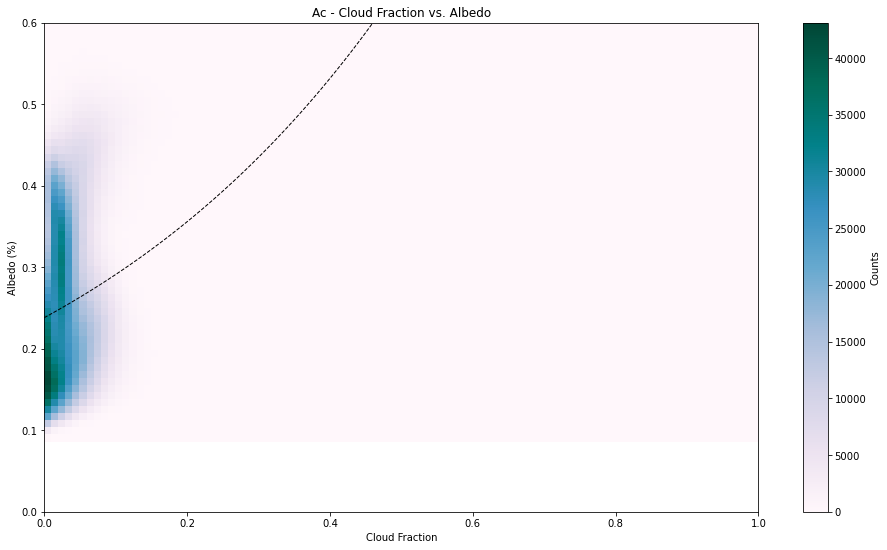

In [46]:
plt.figure(figsize=(16,9))
plt.hist2d(Ac_fc, Final_Ac_Albedo, bins=100, cmap='PuBuGn')
plt.ylim(0,.6)
plt.plot(x_values, Best,linestyle='--', linewidth=1, color="black")
plt.title('Ac - Cloud Fraction vs. Albedo')
plt.xlabel('Cloud Fraction')
plt.ylabel('Albedo (%)')
cbar=plt.colorbar()
cbar.set_label('Counts')